<h1><center> Math761 - HW 5 <br>
MC Integration and Importance Sampling </center> </h1>


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score. Please submit your corrected work with this.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/15uZqvLzWMcp1pvTfCKdq7qcCEpSDBtSQxYeEVn3XUYw/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>

### Exercise 1: Compare MC Integrals

**Explain in Video** Compute two MC estimates of

$$
\theta = \int_{0}^{0.5} e^{-x}dx.
$$

a) First, generate $\hat{\theta}$ by sampling from Uniform(0, 0.5) 10000 times, and also estimate the variance of $\hat{\theta}$.  Show any math needed to create your estimator.

**Hint** set.seed(1) should give you a mean of `0.393501417048076`.

b) Second, find another MC estimator $\tilde{\theta}$ by sampling from the exponential distribution 10,000 times, and also estimate the variance of $\tilde{\theta}$. Show any math needed to create your estimator.

**Hint** set.seed(1) should give you a mean of `3.949000e-01`

c) Create a side-by-side boxplot of the 10,000 runs of these two estimators.

d) Compute the theoretical value of $\theta$.

e) Which of the variances of  $\hat{\theta}$ and $\tilde{\theta}$ is smaller. Explain using the idea of efficiency.

In [33]:
.# Exercise 1A
# Setting seed to check for answer according to hint
set.seed(1)

# Defining the number of samples
n <- 10000

# Sampling from the Uniform distribution
X <- runif(n, min = 0, max = 0.5)

# Applying the function exp(-x) to samples and calculating estimator
theta_hat <- 0.5 * mean(exp(-X))

# Calculating variance of the estimator using the in-built function
theta_variance <- var(0.5 * exp(-X))

# Displaying the results
cat("Theta hat:", theta_hat, "\n")
cat("Variance of Theta hat:", theta_variance, "\n")

Theta hat: 0.3935014 
Variance of Theta hat: 0.003260955 


In [34]:
# Exercise 1B
# Setting seed to check for answer according to hint
set.seed(1)

# Defining the number of samples
n <- 10000

# Sampling from exp dist. with rate = 1
X <- rexp(n, rate = 1)

# Applying the indicator function to check for X <= 0.5
theta_exp <- mean(X <= 0.5)

# Calculating variance of the estimator using the in-built function
theta_exp_variance <- var(X <= 0.5)

# Displaying the result and variance
cat("Theta (exponential) hat:", theta_exp, "\n")
cat("Variance of Theta (exponential) hat:", theta_exp_variance, "\n")

Theta (exponential) hat: 0.3949 
Variance of Theta (exponential) hat: 0.2389779 


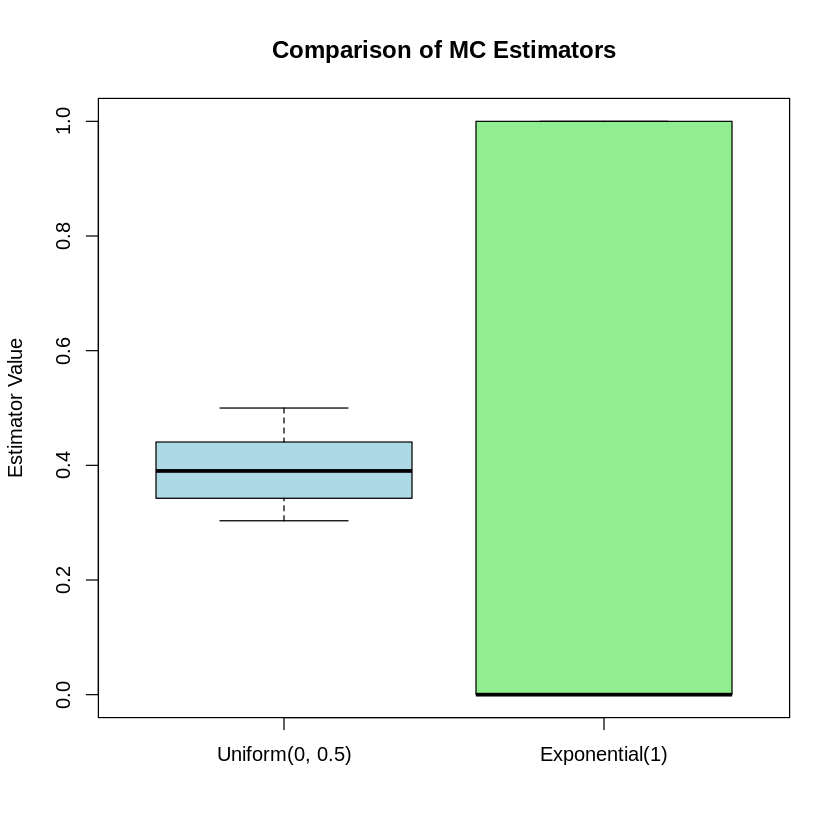

In [ ]:
# Exercise 1C

set.seed(1)

# Defining the number of samples
n <- 10000

# MC estimator 1: Sampling from Uniform dist.
X_uniform <- runif(n, min = 0, max = 0.5)
theta_uniform <- 0.5 * exp(-X_uniform)

# MC estimator 2: Sampling from exp. dist.
X_exp <- rexp(n, rate = 1)
theta_exp <- X_exp <= 0.5

# Combining the two to a data frame to plot
estimates <- data.frame(
  Uniform = theta_uniform,
  Exponential = theta_exp
)

# Creating the boxplot
boxplot(estimates, main = "Comparison of MC Estimators",
        names = c("Uniform(0, 0.5)", "Exponential(1)"),
        ylab = "Estimator Value", col = c("lightblue", "lightgreen"))

Exercise 1D : Included in the PDF file I have attached

Exercise 1E :

I have done the variance calculations for both in the code blocks for Exercises 1A and 1B itself.

The variance of $\hat{\theta}$ is significantly smaller $\tilde{\theta}$, which makes it far more efficient. In terms of the Monte Carlo method, efficiency is related to the variance of an estimator, which means that a lower variance means that a estimator is more stable and will provide more accurate results for the same number of samples. Therefore, $\hat{\theta}$ is more efficient due to the smaller variance.

### Exercise 2: Math Manipulation

Recall from class that it is possible to create estimates of $\Phi(x)= \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{-s^2/2} ds$ by generating random variables from $U(0,x)$.

a) **Write-up only** Show the math that justifies how you can form an estimate of $\Phi(x)$ by using $U(0, x)$ random variables. Hint: this should look similar to the reasoning for the $U(a, b)$ example from class.

b) **Explain in Video** Estimate $\Phi(x)$ for a sequence of 10 equally spaced $x$ values from $-2.5$ to $-.1$ and 10 equally spaced $x$ values from from $.1$ to $2.5.$ Then plot these values as a line plot. Use a sample of 10,000 to estimate each integral.

**Hint** The integral for $x = -2.5$ should be `0.005611057` with SE of ` 0.006209665`.

Exercise 2A is attached in the PDF file I have uploaded

            x       Phi_x           SE
1  -2.5000000 0.005611057 1.324455e-03
2  -2.2333333 0.012984234 1.243596e-03
3  -1.9666667 0.021034357 1.133016e-03
4  -1.7000000 0.045085392 9.886695e-04
5  -1.4333333 0.077761442 8.155112e-04
6  -1.1666667 0.122100154 6.221507e-04
7  -0.9000000 0.184151306 4.069627e-04
8  -0.6333333 0.263252056 2.195150e-04
9  -0.3666667 0.356921385 7.819547e-05
10 -0.1000000 0.460171616 5.909341e-06
11  0.1000000 0.539828777 5.864248e-06
12  0.3666667 0.643081843 7.681036e-05
13  0.6333333 0.736734093 2.188565e-04
14  0.9000000 0.816353009 4.035659e-04
15  1.1666667 0.877513313 6.189518e-04
16  1.4333333 0.924023715 8.215088e-04
17  1.7000000 0.958438958 9.912527e-04
18  1.9666667 0.974500656 1.131995e-03
19  2.2333333 0.979795857 1.246457e-03
20  2.5000000 0.991330441 1.316322e-03


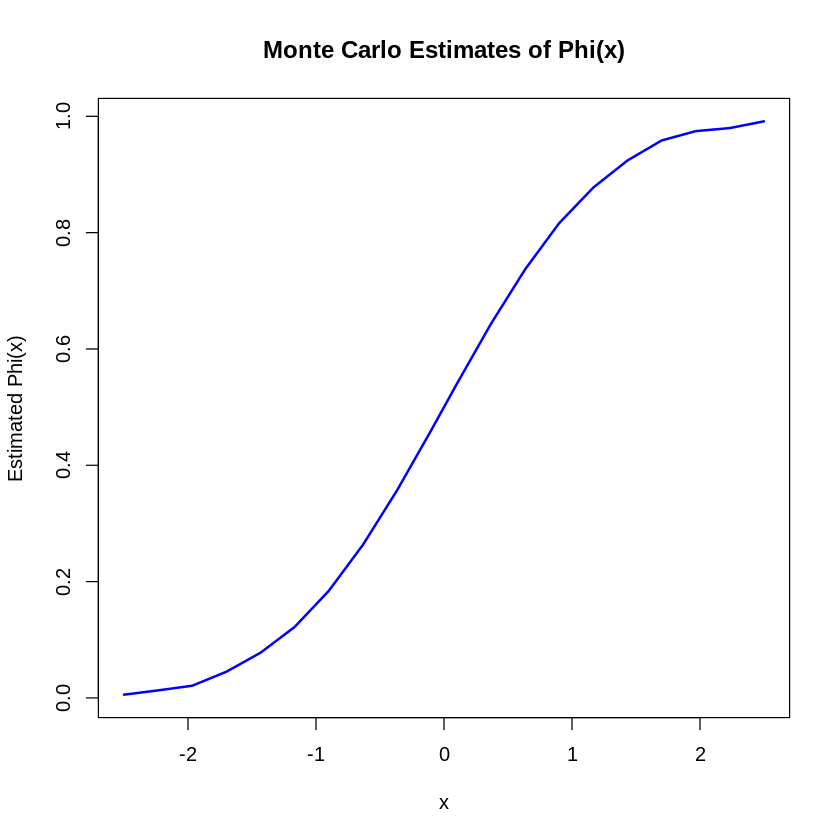

In [28]:
# Exercise 2B

set.seed(1)

# Estimation of Phi(x)
m <- 10000
x_neg <- seq(from = -2.5, to = -0.1, length = 10)  # 10 equally spaced x values from -2.5 to -0.1
phi_neg <- vector(length = 10)  # Initialize a vector to store Phi(x) estimates
se_neg <- vector(length = 10)   # Initialize a vector to store SE values

# Looping through each of the x values to calculate Phi(x)
for (i in 1:10) {
    u <- runif(m, min = 0, max = abs(x_neg[i]))  # Generating uniform RVs
    gs <- (1 / sqrt(2 * pi)) * exp(-(u^2) / 2)  # Calculating Gaussian function values
    phi_neg[i] = 0.5 - abs(x_neg[i]) * mean(gs)  # Phi(x) for negative x
    se_neg[i] <- sqrt(var(gs)) / sqrt(m)  # Calculating SE for each of the x values
}

# Storing the results for negative x
results_neg <- data.frame(x = x_neg, Phi_x = phi_neg, SE = se_neg)

# Estimation of Phi(x) for the positive values
x_pos <- seq(from = 0.1, to = 2.5, length = 10)  # 10 equally spaced x values from 0.1 to 2.5
phi_pos <- vector(length = 10)  # Initialize a vector to store Phi(x) estimates
se_pos <- vector(length = 10)   # Initialize a vector to store SE values

# Looping through each x value to calculate Phi(x)
for (i in 1:10) {
    u <- runif(m, min = 0, max = x_pos[i])  # Generating uniform RVs
    gs <- (1 / sqrt(2 * pi)) * exp(-(u^2) / 2)  # Calculating Gaussian function values
    phi_pos[i] = 0.5 + x_pos[i] * mean(gs)  # Phi(x) for positive x
    se_pos[i] <- sqrt(var(gs)) / sqrt(m)  # Calculating SE for each of the x values
}

# Storing the results for positive x in a data frame
results_pos <- data.frame(x = x_pos, Phi_x = phi_pos, SE = se_pos)

# Combining the results from both negative and positive x
results_combined <- rbind(results_neg, results_pos)

# Plotting the estimates of Phi(x) over the entire range of x
plot(results_combined$x, results_combined$Phi_x, type = "l", col = "blue", lwd = 2,
     main = "Monte Carlo Estimates of Phi(x)",
     xlab = "x", ylab = "Estimated Phi(x)")

# Displaying the combined results as a table
print(results_combined)

### Exercise 3: Importance Sampling


**Explain in Video** Obtain Monte Carlo estimates of
$$
\int_{1}^{\infty} \frac{x^2}{\sqrt{2\pi}}e^{-x^2/2}dx
$$
by importance sampling.

a) For this, you must try out four different importance samplers. Use these two
   - $$
   g_1(x) = \frac{\sqrt{e}}{2}e^{-x/2} \text{ for x > 1 }
   $$
   
   - $$
   g_2(x) = \frac{e^{1/2.88}}{1.44}xe^{-x^2/2.88} \text{ for x > 1}
   $$
   
   and also create two of your own. Please give the equations of your two functions. Also plot all four importance functions along with h(x)f(x) on a single plot.
   
b) Use all four $g_{i}(x)$ to obtain MC estimates of the integral, using a sample of 10000 for each importance function, and also report the estimated variance. Put both estimates and variances in a table. Which of your functions is best and why? Please show any math needed.

**hint:** My two functions and the integrand should look like this:
![image-2.png](attachment:image-2.png)

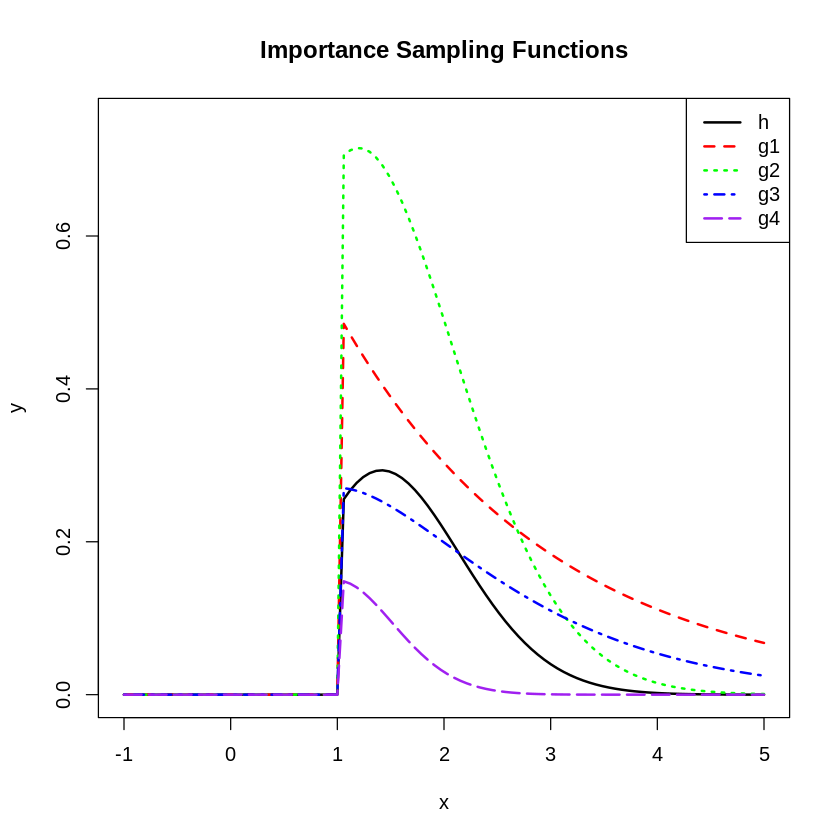

In [32]:
# Exercise 3A

set.seed(1)

# Defining the integrand h(x) * f(x)
hfx <- function(x) {
  (x^2 / sqrt(2 * pi)) * exp(-x^2 / 2) * (x>1)
}

# The given samplers as per the question
g1 <- function(x) {
  sqrt(exp(1)) / 2 * exp(-x / 2) * (x>1)
}

g2 <- function(x) {
  (exp(1 / 2.88) / 1.44) * x * exp(-x^2 / 2.88) * (x>1)
}

# The samplers that I came up with
g3 <- function(x) {
  (2 / exp(1)) * x * exp(-x) * (x>1)
}

g4 <- function(x) {
  (3 / exp(2)) * x^2 * exp(-x^2) * (x>1)
}

# Defining the range for x for plotting
x_values <- seq(-1, 5, length.out = 100)

# Plotting the functions and the integrand
plot(x_values, hfx(x_values), type = "l", col = "black", lwd = 2, ylim = c(0, 0.75),
     ylab = "y", xlab = "x", main = "Importance Sampling Functions")
lines(x_values, g1(x_values), col = "red", lwd = 2, lty = 2)
lines(x_values, g2(x_values), col = "green", lwd = 2, lty = 3)
lines(x_values, g3(x_values), col = "blue", lwd = 2, lty = 4)
lines(x_values, g4(x_values), col = "purple", lwd = 2, lty = 5)

# Addding the legend as per the sample plot provided
legend("topright", legend = c("h", "g1", "g2", "g3", "g4"),
       col = c("black", "red", "green", "blue", "purple"), lty = 1:5, lwd = 2)

In [ ]:
# Exercise 3B

set.seed(1)

# Defining the integrand h(x) * f(x)
hfx <- function(x) {
  (x^2 / sqrt(2 * pi)) * exp(-x^2 / 2)
}

# The given samplers as per the question
g1 <- function(x) {
  sqrt(exp(1)) / 2 * exp(-x / 2)
}

g2 <- function(x) {
  (exp(1 / 2.88) / 1.44) * x * exp(-x^2 / 2.88)
}

# The samplers that I came up with
g3 <- function(x) {
  (2 / exp(1)) * x * exp(-x)
}

g4 <- function(x) {
  (3 / exp(2)) * x^2 * exp(-x^2)
}

# MC Estimator Function
importance_sampling <- function(g, rg, n = 10000) {
  x_samples <- rg(n)  # Generating samples from the g(x)
  weights <- hfx(x_samples) / g(x_samples)  # Importance weights
  estimate <- mean(weights)  # MC estimate
  variance <- var(weights) / n  # Estimated var.
  return(list(estimate = estimate, variance = variance))
}

# Defining the random sample generators for each of the functions
rg1 <- function(n) rexp(n, rate = 1/2) + 1
rg2 <- function(n) rnorm(n, mean = sqrt(2.88), sd = sqrt(2.88))
rg3 <- function(n) rexp(n, rate = 1) + 1
rg4 <- function(n) rchisq(n, df = 2)

# Running importance sampling for all four functions
results_g1 <- importance_sampling(g1, rg1)
results_g2 <- importance_sampling(g2, rg2)
results_g3 <- importance_sampling(g3, rg3)
results_g4 <- importance_sampling(g4, rg4)

# Creatiing a table to display results
results_table <- data.frame(
  Importance_Function = c("g1(x)", "g2(x)", "g3(x)", "g4(x)"),
  Estimate = c(results_g1$estimate, results_g2$estimate, results_g3$estimate, results_g4$estimate),
  Variance = c(results_g1$variance, results_g2$variance, results_g3$variance, results_g4$variance)
)

print(results_table)

  Importance_Function     Estimate      Variance
1               g1(x) 4.021220e-01  9.042389e-06
2               g2(x) 2.114505e-01  5.782102e-06
3               g3(x) 8.947178e-01  1.283034e-05
4               g4(x) 6.353375e+83 4.036538e+167


The best importance sampling function is g1(x). It provides a reasonable estimate of the integral with low variance. Whereas, g2(x) has the lowest variance, its estimate is biased and too low, which makes g1(x) the best choice for accuracy.

I also wanted to mention that the estimate and variance of g4(x) is extremely high since the weight function provides large values. This happens when the support of g4(x) does not match the target function, which leads to larger weight ratios and unstable results.